### Goals: 
* Time in match
* Time to find match


In [2]:
import os
import sys
import json
import pandas as pd
import math
import matplotlib.pyplot as plt
from datetime import datetime
import time
import matplotlib.dates as mdates

%matplotlib inline

def extract_date(data):
    return data_date
    x = data["match_completed"]["ts"]
    first_i = x.first_valid_index()
    last_i = x.last_valid_index()
    first_date = datetime.fromtimestamp(int(x[first_i])/1000.0)
    last_date = datetime.fromtimestamp(int(x[last_i])/1000.0)
    mid = first_date + (last_date - first_date)/2
    return str(mid.date())

def read_data_multiple(path_label_tuples):
    data = {label:read_data(path) for path, label in path_label_tuples}

def expand_custom_params(outer_data, custom_event_name):
    inner_data = (pd.DataFrame(outer_data["custom_params"].tolist())) 
    joined = pd.DataFrame.merge(outer_data, inner_data, left_index=True, right_index=True)
    return joined.drop("custom_params", 1)

def read_data(path):
    custom_data = ""
    with open(path) as f:
        decoder = json.JSONDecoder()
        data = [decoder.decode(line) for line in f.readlines()]
        frame = pd.DataFrame(data)
        custom_data = {name:expand_custom_params(frame[frame["name"] == name], name) for name in pd.unique(frame["name"])}
    return custom_data

In [ ]:

data_dates = [
    "9-20-2016", 
    "9-21-2016", 
    "9-22-2016", 
    "9-23-2016", 
    "9-24-2016", 
    "9-25-2016", 
    "9-26-2016", 
    "9-27-2016", 
    "9-28-2016", 
    "9-29-2016", 
    "9-30-2016",
    "10-1-2016", 
    "10-2-2016", 
    "10-3-2016", 
    "10-4-2016", 
    "10-5-2016", 
    "10-6-2016", 
    "10-7-2016", 
    "10-8-2016", 
]

data = []
dates = []
print "preparing to process" 
for date_string in data_dates:
    fp = "C:/Users/jephron/Downloads/unity_analytics_results/{}.json".format(date_string)
    custom_data = read_data(fp)
    date = datetime.strptime(date_string, "%m-%d-%Y").date()
    dates.append(date)
    data.append(custom_data)
    print "processed", date
    
#     wait_times = custom_data["match_made"]["time_waited"].apply(float)
#     print d, "mean wait time", wait_times.mean(), "seconds"
#     print d, "median wait time", wait_times.median(),"seconds"
#     print d, "maximum wait time", wait_times.max(),"seconds"
#     print d, "min wait time", wait_times.min(),"seconds"
#     wait_data.append(wait_times)
    
#     match_lengths = custom_data["match_completed"]["time_remaining"].apply(float).apply(lambda x : 60-x).where(lambda x : x < 60)
# #     print d, "mean match length ", match_lengths.mean(), "seconds"
# #     print d, "median match length ", match_lengths.median(),"seconds"
# #     print d, "maximum match length ", match_lengths.max(),"seconds"
# #     print d, "min match time ", match_lengths.min(),"seconds"
#     match_length_data.append(match_lengths)
    
#     kos = custom_data["match_completed"][(custom_data["match_completed"]["win_state"] == "Win_ko") | (custom_data["match_completed"]["win_state"] == "WinStreak_ko")]
    
#     ko_data.append(kos)
#     

# filepath = "C:/Users/jephron/Downloads/unity_analytics_results/{}.json".format("9-20-2016")


# multi = [("C:/Users/jephron/Downloads/unity_analytics_results/9-24-2016.json", "9-24-2016"),
#          ("C:/Users/jephron/Downloads/unity_analytics_results/9-23-2016.json", "9-23-2016"),
#          ("C:/Users/jephron/Downloads/unity_analytics_results/9-22-2016.json", "9-22-2016")]

# multidata = read_data_multiple(multi)

# custom_data = read_data(filepath)


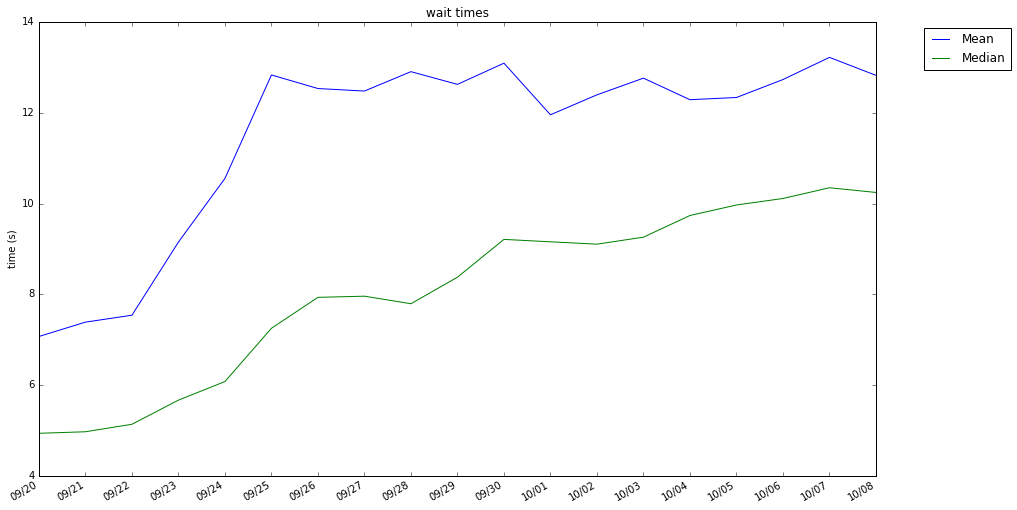

In [99]:
means = map(lambda x : x.mean(), wait_data)
medians = map(lambda x : x.median(), wait_data)
maxes = map(lambda x : x.max(), wait_data)
mins = map(lambda x : x.min(), wait_data)

fig, ax = plt.subplots(1)
plt.title("wait times")
ax.set_ylabel('time (s)')

pltmeans, = plt.plot(dates, means)
pltmedians, = plt.plot(dates, medians)
lgd = plt.legend([pltmeans, pltmedians], ['Mean', 'Median'], bbox_to_anchor=(1.05, 1), loc=2)
fig.autofmt_xdate()
yearsFmt = mdates.DateFormatter('%m/%d')
days = mdates.DayLocator()
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_major_locator(days)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
fig.savefig("./out/waitstimes.png", dpi=200, bbox_extra_artists=(lgd,), bbox_inches='tight')


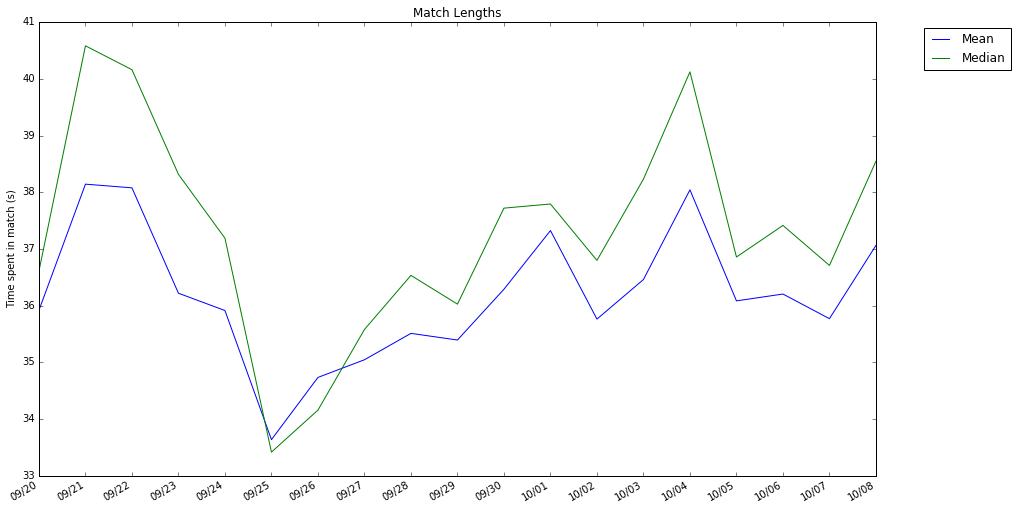

In [5]:
means = map(lambda x : x.mean(), match_length_data)
medians = map(lambda x : x.median(), match_length_data)
maxes = map(lambda x : x.max(), match_length_data)
mins = map(lambda x : x.min(), match_length_data)

fig, ax = plt.subplots(1)
plt.title("Match Lengths")
ax.set_ylabel('Time spent in match (s)')

pltmeans, = plt.plot(dates, means)
pltmedians, = plt.plot(dates, medians)
lgd = plt.legend([pltmeans, pltmedians], ['Mean', 'Median'], bbox_to_anchor=(1.05, 1), loc=2)
fig.autofmt_xdate()
yearsFmt = mdates.DateFormatter('%m/%d')
days = mdates.DayLocator()
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_major_locator(days)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
fig.savefig("./out/match_lengths.png", dpi=200, bbox_extra_artists=(lgd,), bbox_inches='tight')


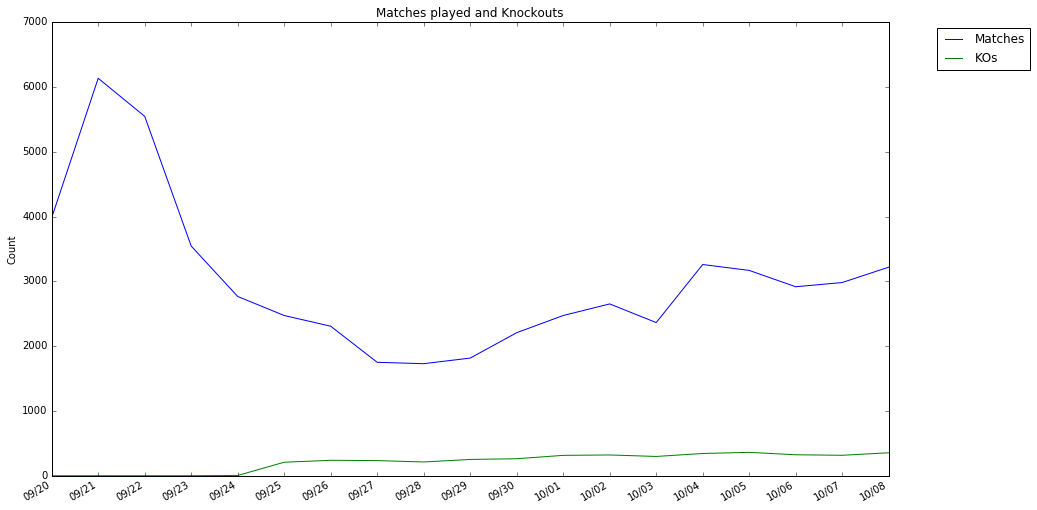

In [23]:
num_matches = map(len, match_length_data)


fig, ax = plt.subplots(1)
plt.title("Matches played and Knockouts")
ax.set_ylabel('Count')

pltmatches, = plt.plot(dates, num_matches)
pltkos, = plt.plot(dates, map(len, ko_data))
lgd = plt.legend([pltmatches, pltkos], ['Matches', 'KOs'], bbox_to_anchor=(1.05, 1), loc=2)

fig.autofmt_xdate()
yearsFmt = mdates.DateFormatter('%m/%d')
days = mdates.DayLocator()
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_major_locator(days)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
fig.savefig("./out/KOs_plus_matches.png", dpi=200)


In [ ]:
wait_times = custom_data["match_made"]["time_waited"].apply(float)
print d, wait_times.mean()
print d, wait_times.median()

matches_completed = custom_data["match_completed"]
matches_completed["player_rank"] = matches_completed["player_rank"].apply(float)
matches_completed["player_score"] = matches_completed["player_score"].apply(float)

z = matches_completed["time_remaining"].apply(float)

def gen_header(title):
    formatted = "d={} : {} : n={}".format(extract_date(custom_data), title, str(len(matches_completed)))
    return formatted

def gen_filename(title):
    formatted = "./out/{}_{}.png".format(extract_date(custom_data), title)
    return formatted

plt = z[z>=0].plot.hist(alpha=0.5, 
                  title=gen_header("match time remaining"), 
                  figsize=(15,10)).set(xlabel="Time remaining (s)")

plt[0].get_figure().savefig(gen_filename("match_time_remaining"))

custom_data["match_made"]["time_waited"] = custom_data["match_made"]["time_waited"].apply(float)
custom_data["match_made"]["player_rank"] = custom_data["match_made"]["player_rank"].apply(float)
plt = custom_data["match_made"].plot.scatter(
    title=gen_header("time waited vs player rank"), 
    y="time_waited", 
    x="player_rank", 
    figsize = (15,10))

plt.get_figure().savefig(gen_filename("time_waited"))

,appid,debug_device,name,platform,remote_ip,sdk_ver,sessionid,submit_time,ts,type,...,idfa,opponent_rank,opponent_score,player_playfab_id,player_rank,player_score,time_remaining,was_knockout,win_state,words_made_player_opponent
46,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,116.86.75.29,u5.4.0f3,6284928003360722104,1475891880055,1475891728565,custom,...,7D53064E-C7E4-4E30-92CC-0B8F29882B03,0,22,7C2DBBA9CC0889E8,7,75,3.799,NaN,WinStreak_ko,13:7
96,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,117.204.17.99,u5.4.0f3,8873897254489320073,1475892907081,1475892898445,custom,...,7D53064E-C7E4-4E30-92CC-0B8F29882B03,0,7,7C2DBBA9CC0889E8,8,37,27.973,NaN,Win_ko,7:2
113,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,49.148.27.85,u5.4.0f3,8526504730251508448,1475896033433,1475895928070,custom,...,7D53064E-C7E4-4E30-92CC-0B8F29882B03,0,9,7C2DBBA9CC0889E8,7,62,17.069,NaN,Win_ko,11:2
165,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,112.198.98.20,u5.4.0f3,5542488009949765498,1475899130796,1475899067226,custom,...,2612D064-0B6A-4445-B49D-BC85B20BB921,4,0,8A3CE85E729CD7B3,3,32,24.31,NaN,Win_ko,7:0
194,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,182.18.213.54,u5.4.0f3,3113397842710168279,1475900335307,1475900246264,custom,...,3E512667-35AC-4CE5-BEEB-D34FAA9903FB,0,25,2AA316ECBC1AD66D,2,55,14.575,NaN,WinStreak_ko,15:4
208,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,117.242.212.128,u5.4.0f3,6969250159313535,1475900610240,1475900599288,custom,...,3E512667-35AC-4CE5-BEEB-D34FAA9903FB,0,0,2AA316ECBC1AD66D,2,30,36.353,NaN,Win_ko,8:0
209,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,117.242.212.128,u5.4.0f3,8873897254489320073,1475900518814,1475892898445,custom,...,3E512667-35AC-4CE5-BEEB-D34FAA9903FB,0,3,2AA316ECBC1AD66D,3,33,35.909,NaN,WinStreak_ko,7:1
225,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,182.18.213.54,u5.4.0f3,3113397842710168279,1475901027620,1475900940260,custom,...,224CE9D0-652E-4B42-82A1-E2AE65951A85,10,38,31772CD570D6EACE,3,71,9.386,NaN,Win_ko,17:8
242,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,182.18.213.54,u5.4.0f3,3113397842710168279,1475901340861,1475901257132,custom,...,142B09D6-CC01-4C75-8674-D9ED598B0452,0,42,D849B8A9F01E1D44,11,72,16.418,NaN,WinStreak_ko,8:11
243,b21beb46-fba5-4027-9cb1-c29ec3c8557c,False,match_completed,iPhonePlayer,182.18.213.54,u5.4.0f3,3113397842710168279,1475901340861,1475901307939,custom,...,142B09D6-CC01-4C75-8674-D9ED598B0452,0,33,D849B8A9F01E1D44,12,68,8.29,NaN,WinStreak_ko,6:9


In [ ]:
matches_made = custom_data["match_made"]
# matches_made["time_waited"].apply(float).plot.hist()
#


In [ ]:
matches_made["time_waited"].apply(float).plot.hist

In [10]:
a = [1,2,3,4,5,6]
a.append